# AID1409607

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/AID_1409607_datatable_all.csv", header=0)
df.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Text Value,Standard Units,Activity Comment,Data Validity Comment
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,STRING,STRING,FLOAT,STRING,STRING,STRING,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,PubChem standardized value transformed from 'S...,Standardized activity type (e.g. IC50 rather t...,"Qualifier (e.g. >, <, =) for 'Standard Value'",Standardized activity value transformed to com...,Standardized version of non-numeric measurement,Selected units for 'Standard Type': e.g. conce...,Additional comments,Comment reflecting whether the values for this...
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,103163840.0,3715.0,Unspecified,NaN,NaN,NaN,17.9887,IC50,>,17988.7,NaN,nM,Depositor Activity Comments:Inactive? Curator ...,NaN


In [3]:
df = df.iloc[4:]
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Text Value,Standard Units,Activity Comment,Data Validity Comment
4,1,103163840.0,3715.0,Unspecified,NaN,NaN,NaN,17.9887,IC50,>,17988.7,NaN,nM,Depositor Activity Comments:Inactive? Curator ...,NaN
5,2,103164548.0,5284616.0,Active,NaN,NaN,NaN,26.3027,IC50,=,26302.7,NaN,nM,"Depositor Activity Comments:Weak/Inconclusive,...",NaN
6,3,103167027.0,5280343.0,Unspecified,NaN,NaN,NaN,2.29087,IC50,>,2290.87,NaN,nM,Depositor Activity Comments:Inactive? Curator ...,NaN
7,4,103167216.0,3559.0,Active,NaN,NaN,NaN,40.4576,IC50,=,40457.6,NaN,nM,Depositor Activity Comments:Active,NaN
8,5,103170416.0,4413.0,Unspecified,NaN,NaN,NaN,39.8107,IC50,>,39810.7,NaN,nM,Depositor Activity Comments:Inactive? Curator ...,NaN
9,6,103172458.0,53232.0,Unspecified,NaN,NaN,NaN,1819.7,IC50,=,1.8197e+06,NaN,nM,Depositor Activity Comments:Weak/Inconclusive,Outside typical range
10,7,103173857.0,53389.0,Unspecified,NaN,NaN,NaN,269.153,IC50,=,269153,NaN,nM,"Depositor Activity Comments:Inconclusive, Inco...",Outside typical range
11,8,103175236.0,447043.0,Unspecified,NaN,NaN,NaN,7762.47,IC50,=,7.76247e+06,NaN,nM,"Depositor Activity Comments:Weak/Inconclusive,...",Outside typical range
12,9,103177883.0,3121.0,Unspecified,NaN,NaN,NaN,0.12106,IC50,>,121.06,NaN,nM,Depositor Activity Comments:Inactive??Test At ...,NaN
13,10,103181943.0,4829.0,Unspecified,NaN,NaN,NaN,0.67608,IC50,>,676.08,NaN,nM,Depositor Activity Comments:Inactive? Curator ...,NaN


In [5]:
df = df.reset_index()
df = df[['PUBCHEM_SID', 'PubChem Standard Value']]
df

,PUBCHEM_SID,PubChem Standard Value
0,103163840.0,17.9887
1,103164548.0,26.3027
2,103167027.0,2.29087
3,103167216.0,40.4576
4,103170416.0,39.8107
5,103172458.0,1819.7
6,103173857.0,269.153
7,103175236.0,7762.47
8,103177883.0,0.12106
9,103181943.0,0.67608


In [6]:
df2 = df.apply(pd.to_numeric)
df2.dtypes

PUBCHEM_SID               float64
PubChem Standard Value    float64
dtype: object

In [7]:
import numpy as np
df2['Active'] = df2.apply(lambda x: 1 if x['PubChem Standard Value'] <= 5.0 else 0, axis=1)
df2 = df2.dropna()
# df1['Active'] = np.where(df1['PubChem Standard Value']<=5.0, 1,0)
# df1['PubChem Standard Value'] = pd.to_numeric(df1['PubChem Standard Value'])
df2

,PUBCHEM_SID,PubChem Standard Value,Active
0,103163840.0,17.988700,0
1,103164548.0,26.302700,0
2,103167027.0,2.290870,1
3,103167216.0,40.457600,0
4,103170416.0,39.810700,0
5,103172458.0,1819.700000,0
6,103173857.0,269.153000,0
7,103175236.0,7762.470000,0
8,103177883.0,0.121060,1
9,103181943.0,0.676080,1


,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS
0,0,0,103163840,12,ChEMBL,CHEMBL6,CHEBI:49662\nIndometacin\nIndometacin Farnesil...,CHEMBL6,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,3715 1,1\n3,103163840,,NaN
1,0,0,103164548,10,ChEMBL,CHEMBL413,CHEBI:9168\nAY-22989\nL04AA10\nNSC-226080\nRap...,CHEMBL413,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,5284616 1,1\n3,103164548,,14 16 5\n17 56 5\n20 67 5\n22 23 6\n30...
2,0,0,103167027,12,ChEMBL,CHEMBL50,CHEBI:16243\nC.I. Natural Red 1\nLDN 0052529\n...,CHEMBL50,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,5280343 1,1\n3,103167027,,NaN
3,0,0,103167216,10,ChEMBL,CHEMBL54,CHEBI:5613\nHaloperidol\nMCN-JR-1625\nNSC-1709...,CHEMBL54,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,3559 1,1\n3,103167216,,NaN
4,0,0,103170416,8,ChEMBL,CHEMBL273264,Nafamostat\nCHEMBL273264,CHEMBL273264,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,4413 1,1\n3,103170416,,NaN
5,0,0,103172458,9,ChEMBL,CHEMBL503,CHEBI:40303\nC10AA02\nL-154803\nLovastatin\nMK...,CHEMBL503,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,53232 1,1\n3,103172458,,10 11 6\n16 17 5\n18 19 5\n21 20 5\n23...
6,0,0,103173857,9,ChEMBL,CHEMBL275707,Rimcazole\nCHEMBL275707,CHEMBL275707,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,53389 1,1\n3,103173857,,21 23 6\n22 24 6
7,0,0,103175236,10,ChEMBL,CHEMBL529,CHEBI:2955\nAzithromycin\nAzithromycin Dihydra...,CHEMBL529,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,447043 1,1\n3,103175236,,11 22 6\n12 26 5\n13 23 5\n13 27 6\n14...
8,0,0,103177883,10,ChEMBL,CHEMBL109,CHEBI:39867\nNSC-93819\nValproic acid\nCHEMBL109,CHEMBL109,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,3121 1,1\n3,103177883,,NaN
9,0,0,103181943,8,ChEMBL,CHEMBL595,CHEBI:8228\nAD-4833\nActos\nDuetact\nPioglitaz...,CHEMBL595,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,4829 1,1\n3,103181943,,NaN

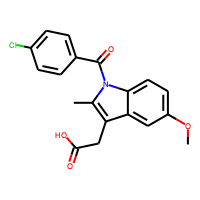
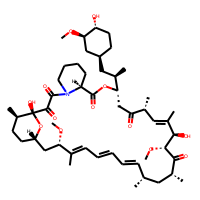
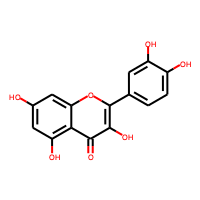
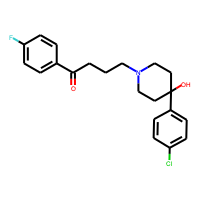
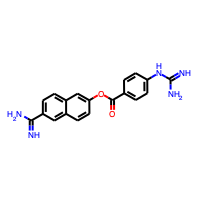
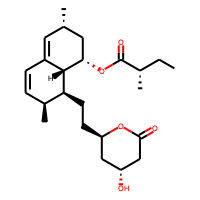
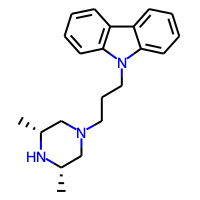
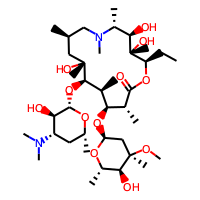
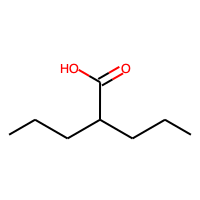
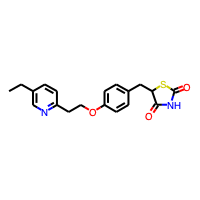
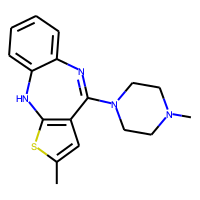
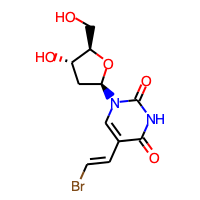
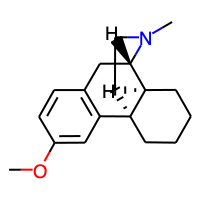
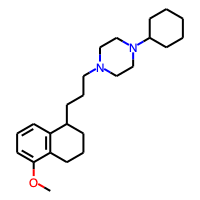
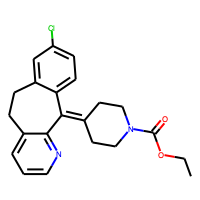
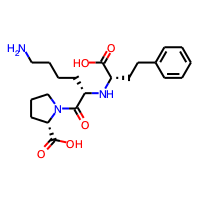
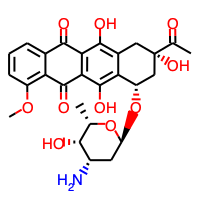
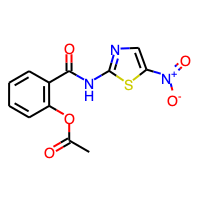
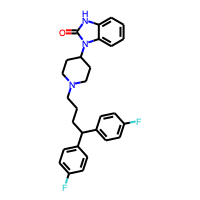
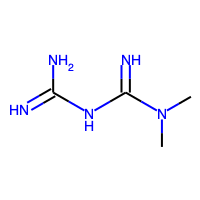
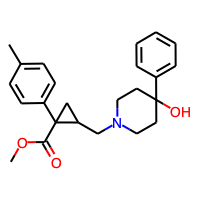
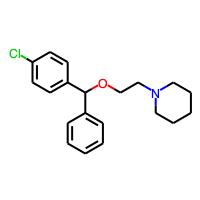
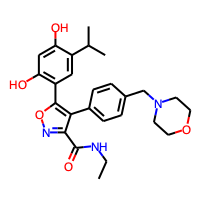
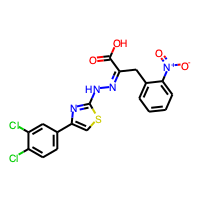
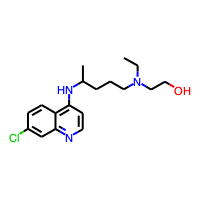
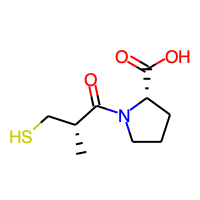
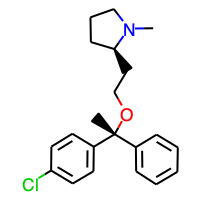
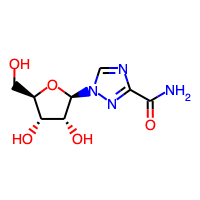
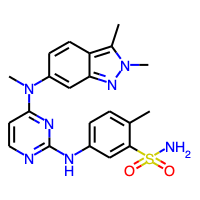
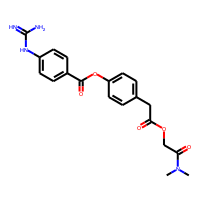
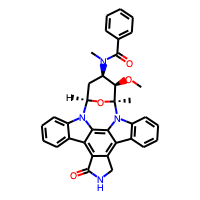
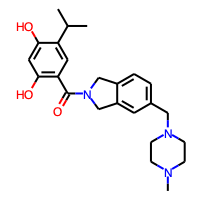
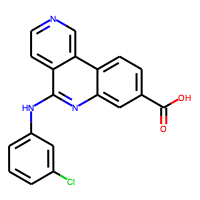
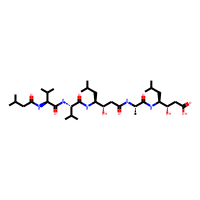
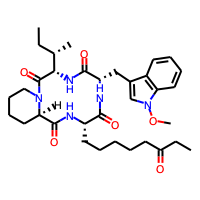
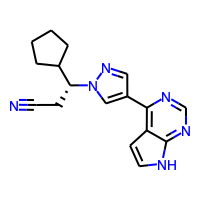
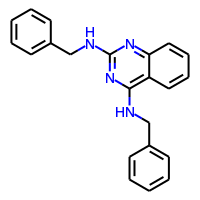
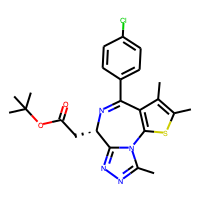
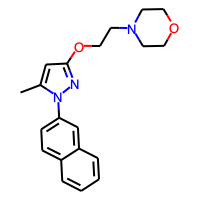
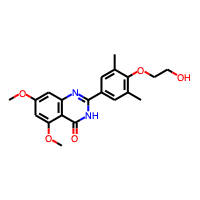
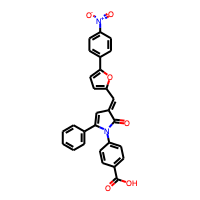
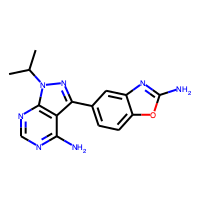
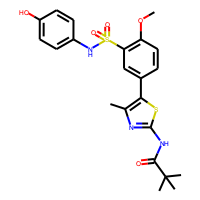
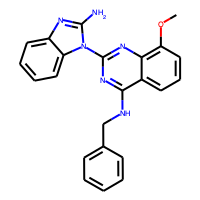
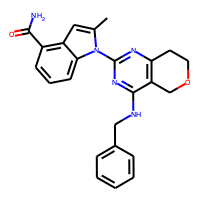
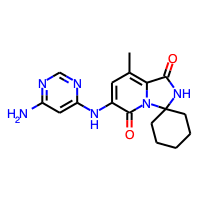
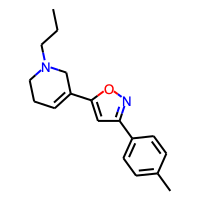
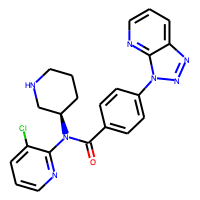
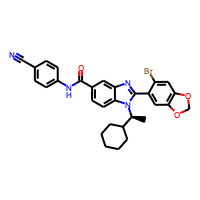
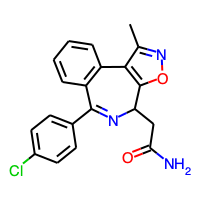
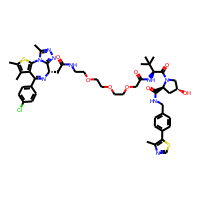
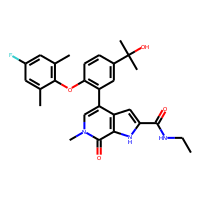
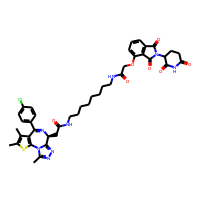
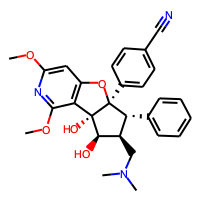
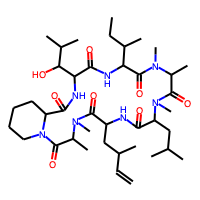
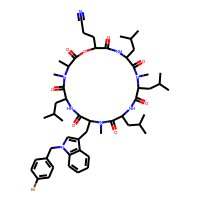
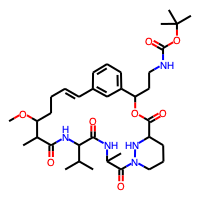

In [8]:
from rdkit.Chem import PandasTools
SDFFile = "data/1817399866942882151.sdf"
test = PandasTools.LoadSDF(SDFFile)
test 

,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,SMILES
0,0,0,103163840,12,ChEMBL,CHEMBL6,CHEBI:49662\nIndometacin\nIndometacin Farnesil...,CHEMBL6,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,3715 1,1\n3,103163840,,NaN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
1,0,0,103164548,10,ChEMBL,CHEMBL413,CHEBI:9168\nAY-22989\nL04AA10\nNSC-226080\nRap...,CHEMBL413,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,5284616 1,1\n3,103164548,,14 16 5\n17 56 5\n20 67 5\n22 23 6\n30...,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
2,0,0,103167027,12,ChEMBL,CHEMBL50,CHEBI:16243\nC.I. Natural Red 1\nLDN 0052529\n...,CHEMBL50,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,5280343 1,1\n3,103167027,,NaN,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
3,0,0,103167216,10,ChEMBL,CHEMBL54,CHEBI:5613\nHaloperidol\nMCN-JR-1625\nNSC-1709...,CHEMBL54,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,3559 1,1\n3,103167216,,NaN,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1
4,0,0,103170416,8,ChEMBL,CHEMBL273264,Nafamostat\nCHEMBL273264,CHEMBL273264,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,4413 1,1\n3,103170416,,NaN,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1
5,0,0,103172458,9,ChEMBL,CHEMBL503,CHEBI:40303\nC10AA02\nL-154803\nLovastatin\nMK...,CHEMBL503,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,53232 1,1\n3,103172458,,10 11 6\n16 17 5\n18 19 5\n21 20 5\n23...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...
6,0,0,103173857,9,ChEMBL,CHEMBL275707,Rimcazole\nCHEMBL275707,CHEMBL275707,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,53389 1,1\n3,103173857,,21 23 6\n22 24 6,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1
7,0,0,103175236,10,ChEMBL,CHEMBL529,CHEBI:2955\nAzithromycin\nAzithromycin Dihydra...,CHEMBL529,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,447043 1,1\n3,103175236,,11 22 6\n12 26 5\n13 23 5\n13 27 6\n14...,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...
8,0,0,103177883,10,ChEMBL,CHEMBL109,CHEBI:39867\nNSC-93819\nValproic acid\nCHEMBL109,CHEMBL109,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,3121 1,1\n3,103177883,,NaN,CCCC(CCC)C(=O)O
9,0,0,103181943,8,ChEMBL,CHEMBL595,CHEBI:8228\nAD-4833\nActos\nDuetact\nPioglitaz...,CHEMBL595,https://www.ebi.ac.uk/chembldb/,https://www.ebi.ac.uk/chembl/compound_report_c...,4829 1,1\n3,103181943,,NaN,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1

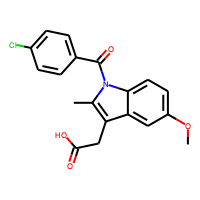
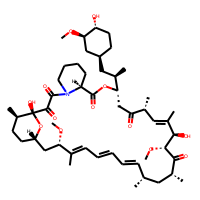
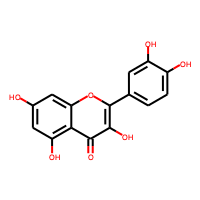
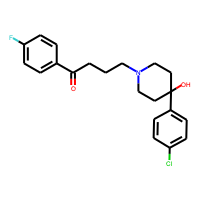
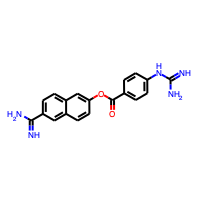
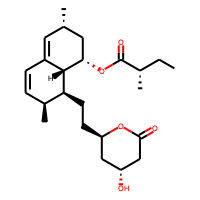
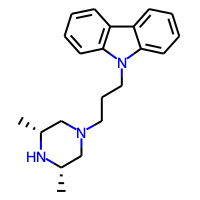
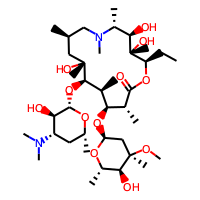
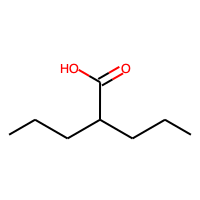
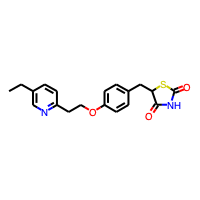
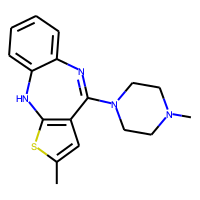
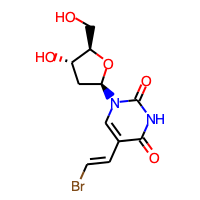
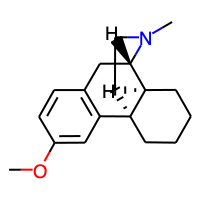
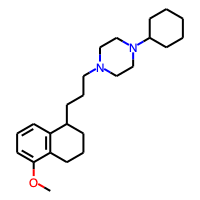
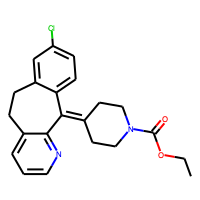
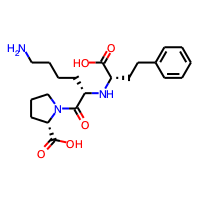
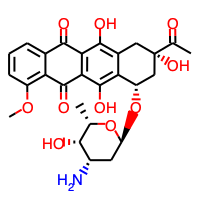
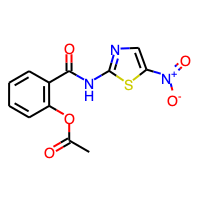
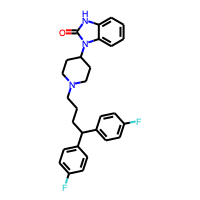
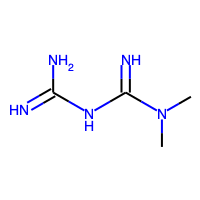
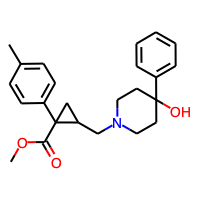
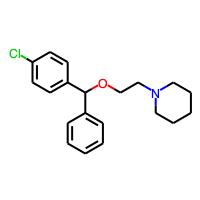
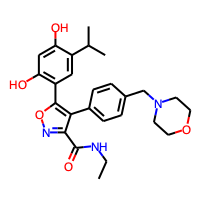
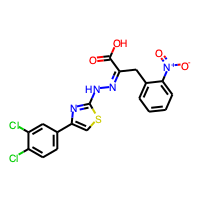
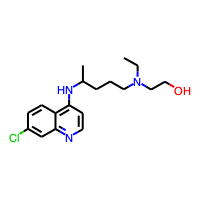
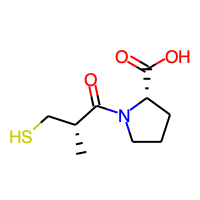
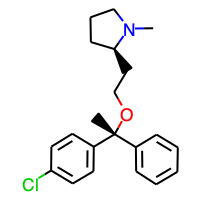
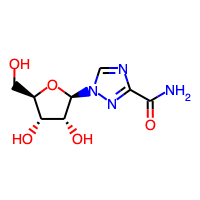
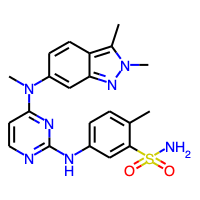
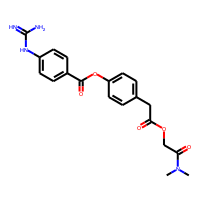
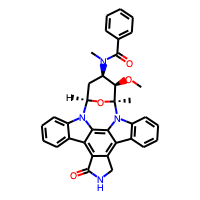
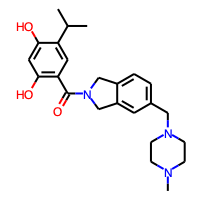
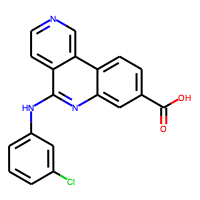
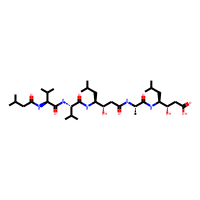
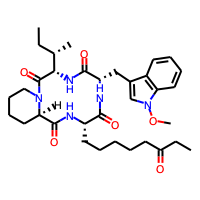
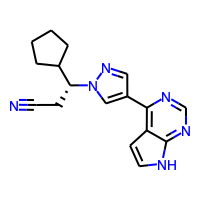
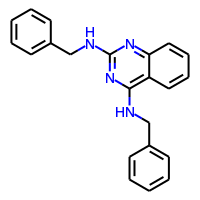
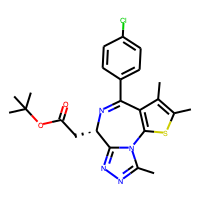
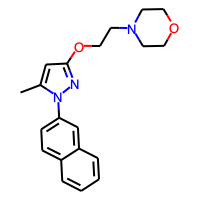
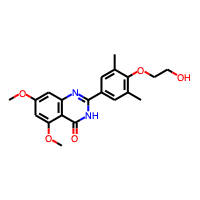
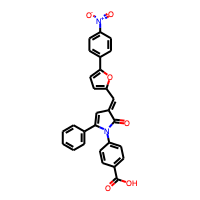
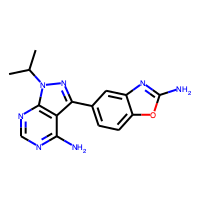
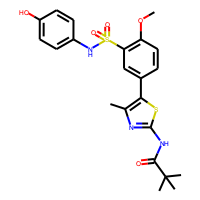
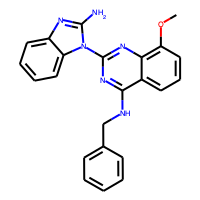
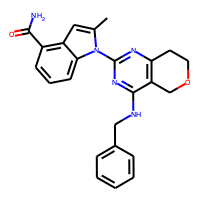
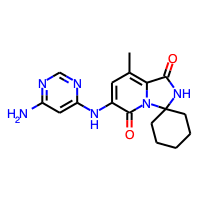
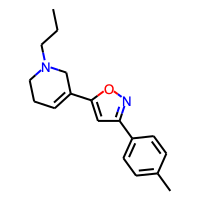
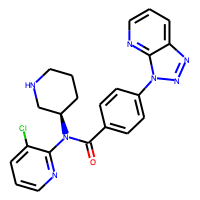
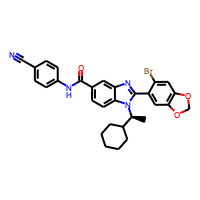
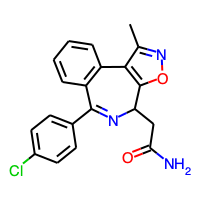
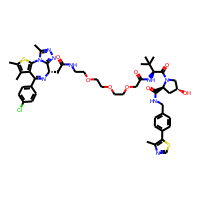
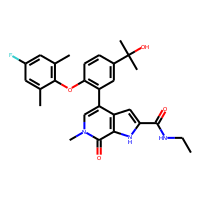
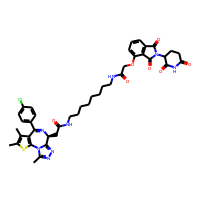
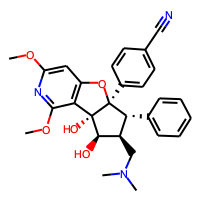
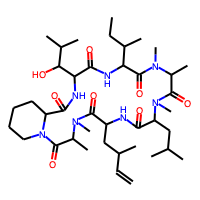
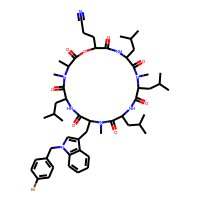
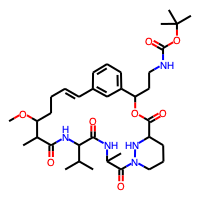

In [9]:
from rdkit import Chem
test['SMILES']= test.apply(lambda x: Chem.MolToSmiles(x['ROMol']), axis=1)
test

In [10]:
test = test[['PUBCHEM_SUBSTANCE_ID','SMILES']]
test

,PUBCHEM_SUBSTANCE_ID,SMILES
0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
1,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
2,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
3,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1
4,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1
5,103172458,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...
6,103173857,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1
7,103175236,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...
8,103177883,CCCC(CCC)C(=O)O
9,103181943,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1


In [11]:
df2 = df2.join(test)
df2

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103163840.0,17.988700,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
1,103164548.0,26.302700,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
2,103167027.0,2.290870,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
3,103167216.0,40.457600,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1
4,103170416.0,39.810700,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1
5,103172458.0,1819.700000,0,103172458,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...
6,103173857.0,269.153000,0,103173857,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1
7,103175236.0,7762.470000,0,103175236,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...
8,103177883.0,0.121060,1,103177883,CCCC(CCC)C(=O)O
9,103181943.0,0.676080,1,103181943,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1


In [17]:
df2.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES
Active,,,,
0,26,26,26,26
1,30,30,30,30


In [14]:
from utils import load_and_prepCSV, load_and_prepSDF, finalise_dataset
csv = f"data/AID_255062_datatable_all.csv"
pubchem = f"data/1126838623513267552.sdf"
df3 = load_and_prepCSV(csv)
pc = load_and_prepSDF(pubchem)
training2 = finalise_dataset(df3, pc)
training2

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103180097.0,5.6,0,103180097,O=C(O)C(=O)/C=C(\O)c1ccccc1
1,103292424.0,93.0,0,103292424,O=C(O)C(=O)/C=C(\O)c1cccn1Cc1ccc(F)cc1
2,103329595.0,8.0,0,103329595,O=C(O)C(=O)/C=C(\O)c1cccc(OCc2ccccc2)c1
3,103435959.0,0.1,1,103435959,N#Cc1ccc(Br)cc1COc1cccc(/C(O)=C/C(=O)C(=O)O)c1
4,103470592.0,29.0,0,103470592,O=C(O)C(=O)/C=C(\O)c1cccn1Cc1ccccc1
...,...,...,...,...,...
62,103470958.0,2.0,1,103470958,Cc1ccc(/C(O)=C/C(=O)C(=O)O)c(C)c1
63,103470959.0,6.0,0,103470959,O=C(O)C(=O)/C=C(\O)c1cccc(OCc2cc(-c3ccccc3)on2)c1
64,103470964.0,6.7,0,103470964,O=C(O)C(=O)/C=C(\O)C12C[C@H]3C[C@@H](C1)C[C@@H...
65,103470965.0,12.0,0,103470965,Cc1cccc(/C(O)=C/C(=O)C(=O)O)c1


In [16]:
training2.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES
Active,,,,
0,53,53,53,53
1,14,14,14,14


In [28]:
final = pd.concat([df2, training2])
final

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103163840.0,17.98870,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
1,103164548.0,26.30270,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
2,103167027.0,2.29087,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
3,103167216.0,40.45760,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1
4,103170416.0,39.81070,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1
...,...,...,...,...,...
62,103470958.0,2.00000,1,103470958,Cc1ccc(/C(O)=C/C(=O)C(=O)O)c(C)c1
63,103470959.0,6.00000,0,103470959,O=C(O)C(=O)/C=C(\O)c1cccc(OCc2cc(-c3ccccc3)on2)c1
64,103470964.0,6.70000,0,103470964,O=C(O)C(=O)/C=C(\O)C12C[C@H]3C[C@@H](C1)C[C@@H...
65,103470965.0,12.00000,0,103470965,Cc1cccc(/C(O)=C/C(=O)C(=O)O)c1


In [18]:
csv = f"data/AID_1143407_datatable_all.csv"
pubchem = f"data/3171584971049892057.sdf"
df4 = load_and_prepCSV(csv)
pc1 = load_and_prepSDF(pubchem)
training3 = finalise_dataset(df4, pc1)
training3

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103745584.0,6.0,0,103745584,Cn1cc(/C=C2\Oc3cc(O)cc(O)c3C2=O)c2ccccc21
1,194185364.0,5.0,1,194185364,CN(C)c1ccc(/C=C2\Oc3cc(O)cc(O)c3C2=O)cc1
3,242636790.0,4.0,1,242636790,CCCCOc1ccc(/C=C2\Oc3cc(O)cc(O)c3C2=O)c(OCCCC)c1
4,242636791.0,5.5,0,242636791,O=C1/C(=C/c2ccc(N3CCCCC3)cc2)Oc2cc(O)cc(O)c21
5,242636792.0,5.4,0,242636792,O=C1/C(=C/c2ccc(C(F)(F)F)cc2)Oc2cc(O)cc(O)c21
6,242636793.0,4.0,1,242636793,O=C1/C(=C/c2ccc(-c3cccs3)cc2)Oc2cc(O)cc(O)c21
7,242636794.0,4.0,1,242636794,O=C1/C(=C/c2ccc(-c3ccccc3)cc2)Oc2cc(O)cc(O)c21
9,242636796.0,3.4,1,242636796,O=C1/C(=C/c2ccc3ccccc3c2)Oc2cc(O)cc(O)c21
11,242636798.0,10.0,0,242636798,O=C1/C(=C/c2ccc3[nH]cnc3c2)Oc2cc(O)cc(O)c21
12,242636799.0,16.0,0,242636799,O=C1/C(=C/c2cnc[nH]2)Oc2cc(O)cc(O)c21


In [19]:
training3.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES
Active,,,,
0,9,9,9,9
1,17,17,17,17


In [20]:
csv = f"data/AID_1401288_datatable_all.csv"
pubchem = f"data/3863973400097120853.sdf"
df5 = load_and_prepCSV(csv)
pc2 = load_and_prepSDF(pubchem)
training4 = finalise_dataset(df5, pc2)
training4

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,164137560.0,17.3,0,164137560,CN1c2c(C(=O)Nc3ccc(NS(C)(=O)=O)cc3)nn(-c3cccc(...
1,242619991.0,13.6,0,242619991,CN1c2c(C(=O)Nc3ccc(NS(C)(=O)=O)cc3)nn(-c3ccc(C...
2,242619997.0,14.1,0,242619997,Cc1ccc(-n2nc(C(=O)Nc3ccc(NS(C)(=O)=O)cc3)c3c2-...
3,404695435.0,7.0,0,404695435,O=C(OC1=CS(=O)(=O)Nc2ccc(Oc3cccc(Br)c3)cc21)c1...
4,404696790.0,2.6,1,404696790,CN1c2ccc(Oc3cccc(Br)c3)cc2C(c2ccccc2C(=O)O)=CS...
5,404698283.0,1.7,1,404698283,O=C(O)c1cc(Oc2cccc(Br)c2)ccc1NS(=O)(=O)c1ccc([...
6,404698932.0,46.2,0,404698932,COC1=CS(=O)(=O)N(C(=O)c2ccccc2)c2ccc(Oc3ccccc3...
7,404700017.0,6.9,0,404700017,CCc1cccc(Oc2ccc3c(c2)C(OC(=O)c2ccccc2)=CS(=O)(...
8,404700020.0,4.7,1,404700020,COc1ccc(C(=O)OC2=CS(=O)(=O)Nc3ccc(Oc4cccc(Br)c...
9,404702214.0,41.5,0,404702214,CCOC1=CS(=O)(=O)Nc2ccc(Oc3ccccc3Br)cc21


In [22]:
training4.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES
Active,,,,
0,16,16,16,16
1,7,7,7,7


In [23]:
csv = f"data/AID_1303367_datatable_all.csv"
pubchem = f"data/851071281757293998.sdf"
df6 = load_and_prepCSV(csv)
pc3 = load_and_prepSDF(pubchem)
training5 = finalise_dataset(df6, pc3)
training5

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103273904.0,1.100,1,103273904,C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1cnc2c(=O)...
1,103619997.0,1.300,1,103619997,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1
2,136922653.0,1.200,1,136922653,O=[N+]([O-])c1ccc(-c2nc3cc4cccnc4c(Cl)c3[nH]2)cc1
3,136925887.0,100.000,0,136925887,Clc1c2ncccc2cc2nn[nH]c12
4,136929114.0,20.000,0,136929114,O=[N+]([O-])c1ccc(-c2nc3cc4cccnc4cc3[nH]2)cc1
5,136935814.0,100.000,0,136935814,CC(C)c1nc2c(Cl)c3ncccc3cc2[nH]c1=O
6,136938943.0,100.000,0,136938943,Clc1c2ncccc2cc2nc[nH]c12
7,136942145.0,23.000,0,136942145,O=[N+]([O-])c1c2cccnc2c(Cl)c2[nH]nnc12
8,136942146.0,100.000,0,136942146,c1cnc2cc3[nH]cnc3cc2c1
9,136942147.0,4.000,1,136942147,Clc1c2ncccc2cc2nc(-c3ccccc3)[nH]c12


In [24]:
training5.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES
Active,,,,
0,18,18,18,18
1,17,17,17,17


In [25]:
csv = f"data/AID_1456622_datatable_all.csv"
pubchem = f"data/2003738735470513881.sdf"
df7 = load_and_prepCSV(csv)
pc4 = load_and_prepSDF(pubchem)
training6 = finalise_dataset(df7, pc4)
training6

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,194145406.0,0.0022,1,194145406,O=C(NC1CC1)c1cc2c(s1)-c1ccccc1N(C(=O)c1ccc(NC(...
1,381838317.0,0.0131,1,381838317,O=C(Nc1ccc(C(=O)N2CCc3cc(-c4nc5cncnc5[nH]4)sc3...
2,381839069.0,0.0006,1,381839069,O=C(Nc1ccc(C(=O)N2CCc3cc(-c4nc5c(C(F)(F)F)cccc...
3,381841143.0,0.0008,1,381841143,O=C(Nc1ccc(C(=O)N2CCc3cc(-c4nc5ccccc5[nH]4)sc3...
4,381841980.0,0.0016,1,381841980,Cc1cnc(N2CC3(CCOCC3)C2)c(C(=O)Nc2ccc(C(=O)N3CC...
5,381842994.0,0.0073,1,381842994,O=C(Nc1ccc(C(=O)N2CCc3cc(-c4nc5ccccc5[nH]4)sc3...
6,381844116.0,0.0007,1,381844116,CCc1cnc(N2CC3(CCOCC3)C2)c(C(=O)Nc2ccc(C(=O)N3C...
7,381845443.0,0.0006,1,381845443,N#Cc1cccc2[nH]c(-c3cc4c(s3)-c3ccccc3N(C(=O)c3c...
8,381846621.0,0.0005,1,381846621,O=C(Nc1ccccc1)c1cc2c(s1)-c1ccccc1N(C(=O)c1ccc(...
9,381848970.0,0.0018,1,381848970,Cc1cnc(N2CC3(CCOCC3)C2)c(C(=O)Nc2ccc(C(=O)N3CC...


In [26]:
csv = f"data/AID_642211_datatable_all.csv"
pubchem = f"data/2651181772145370329.sdf"
df8 = load_and_prepCSV(csv)
pc5 = load_and_prepSDF(pubchem)
training7 = finalise_dataset(df8, pc5)
training7

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103273904.0,1.1,1,103273904,C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1cnc2c(=O)...
1,103696743.0,100.0,0,103696743,[O-][n+]1n[nH]c2c(Cl)c3ncccc3cc21
2,103696751.0,100.0,0,103696751,c1cnc2cc3[nH]nnc3cc2c1
3,136922651.0,100.0,0,136922651,O=[N+]([O-])c1c2cccnc2c(Cl)c2[nH]n[n+]([O-])c12
4,136922652.0,100.0,0,136922652,N#CCn1nnc2cc3cccnc3c(Cl)c21
5,136922653.0,1.2,1,136922653,O=[N+]([O-])c1ccc(-c2nc3cc4cccnc4c(Cl)c3[nH]2)cc1
6,136922654.0,20.0,0,136922654,Clc1c2ncccc2cc2nc(CBr)c(CBr)nc12
7,136922655.0,6.5,0,136922655,CCc1nc2cc3cccnc3c(Cl)c2[nH]c1=O
8,136925887.0,100.0,0,136925887,Clc1c2ncccc2cc2nn[nH]c12
9,136925888.0,100.0,0,136925888,Oc1ccnc2c(Cl)c3[nH]nnc3cc12


In [27]:
training7.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES
Active,,,,
0,38,38,38,38
1,6,6,6,6


In [29]:
final = pd.concat([df2, training2, training3, training4, training5, training6, training7])
final

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES
0,103163840.0,17.98870,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
1,103164548.0,26.30270,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
2,103167027.0,2.29087,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
3,103167216.0,40.45760,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1
4,103170416.0,39.81070,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1
...,...,...,...,...,...
39,136942149.0,100.00000,0,136942149,Clc1ccc(-c2nc3cc4cccnc4cc3[nH]2)cc1Cl
40,136942150.0,11.00000,0,136942150,O=c1[nH]c2cc3cccnc3c(Cl)c2nc1-c1ccccc1
41,136945316.0,100.00000,0,136945316,[O-][n+]1n[nH]c2c(Cl)c3nccc(O)c3cc21
42,136945317.0,53.00000,0,136945317,O=C(CCl)Cn1nnc2c(Cl)c3ncccc3cc21


In [ ]:
# search for repeats